In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sentence_transformers import SentenceTransformer

In [ ]:
df = pd.read_csv('sample_reviews.csv')

In [ ]:
# Encode the target variable 'label' into numerical format
df['label_encoded'] = df['label'].apply(lambda x: 1 if x == 'CG' else 0)

In [ ]:
from gensim.downloader import load
from gensim.utils import simple_preprocess

word2vec_model = load("word2vec-google-news-300")  # This handles download & loading for you

# Function to clean and tokenize text
def clean_and_tokenize(text):
    return simple_preprocess(text)  # Tokenizes, lowercases, removes punctuations



# Tokenize text_
df["text_processed"] = df["text_"].astype(str).apply(clean_and_tokenize)

# Function to get sentence embeddings by averaging word vectors
def get_sentence_embedding(tokens):
    vectors = [word2vec_model[word] for word in tokens if word in word2vec_model]
    return np.mean(vectors, axis=0) if vectors else np.zeros(word2vec_model.vector_size)

# Compute embeddings
X_w2v = np.array(df["text_processed"].apply(get_sentence_embedding).tolist())

# Extract labels
y = df["label_encoded"]


In [ ]:
print(X_w2v.shape)

(40432, 300)


In [ ]:

# Function to clean text (basic cleaning, but keep punctuation for embeddings)
def clean_text2(text):
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text.lower()  # Convert to lowercase

# Clean text_
df["text_"] = df["text_"].astype(str).apply(clean_text2)

# Load a pretrained Sentence Transformer model
# model = SentenceTransformer('all-mpnet-base-v2')
model = SentenceTransformer('all-MiniLM-L6-v2')

# Compute sentence embeddings
X_base = np.array(model.encode(df["text_"].tolist()))

# Extract labels
y = df["label_encoded"]

In [ ]:
print(X_base.shape)

(40432, 384)


In [ ]:

# Function to clean text (basic cleaning, but keep punctuation for embeddings)
def clean_text2(text):
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text.lower()  # Convert to lowercase

# Clean text_
df["text_"] = df["text_"].astype(str).apply(clean_text2)

# Load a pretrained Sentence Transformer model
# model = SentenceTransformer('all-mpnet-base-v2')
model = SentenceTransformer('finetuned-embedding-model_orig')

# Compute sentence embeddings
X = np.array(model.encode(df["text_"].tolist()))

# Extract labels
y = df["label_encoded"]

You are trying to use a model that was created with Sentence Transformers version 4.1.0, but you're currently using version 4.0.2. This might cause unexpected behavior or errors. In that case, try to update to the latest version.


In [ ]:

# Function to clean text (basic cleaning, but keep punctuation for embeddings)
def clean_text2(text):
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text.lower()  # Convert to lowercase

# Clean text_
df["text_"] = df["text_"].astype(str).apply(clean_text2)

# Load a pretrained Sentence Transformer model
# model = SentenceTransformer('all-mpnet-base-v2')
model_2 = SentenceTransformer('finetuned-embedding-model')

# Compute sentence embeddings
X_2 = np.array(model_2.encode(df["text_"].tolist()))

# Extract labels
y_2 = df["label_encoded"]

You are trying to use a model that was created with Sentence Transformers version 4.1.0, but you're currently using version 4.0.2. This might cause unexpected behavior or errors. In that case, try to update to the latest version.


In [ ]:
X_2 = np.array(model_2.encode(df["text_"].tolist()))

In [ ]:
X_finetuned = X_2

In [ ]:
print(X_2.shape)

(40432, 384)


In [ ]:
print(X_2)

[[ 0.05121171 -0.13156465 -0.08073665 ...  0.05205933  0.01949825
   0.04690118]
 [ 0.04662985 -0.1380331  -0.07783449 ...  0.05155411  0.01411614
   0.05094189]
 [ 0.05057134 -0.12763233 -0.08592441 ...  0.04771347  0.02953343
   0.0629709 ]
 ...
 [-0.04670896  0.13984248  0.08246821 ... -0.06363366 -0.01313448
  -0.05605846]
 [ 0.05277877 -0.13275316 -0.07662549 ...  0.04840408  0.01517112
   0.04900347]
 [-0.04701654  0.13481128  0.08522808 ... -0.06209384 -0.01470875
  -0.05672019]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X = X_finetuned
# Step 1: First split — hold out 10% for test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

# Step 2: Second split — split remaining 90% into 80% train and 10% val
# Since X_temp is 90%, we want to split off 1/9 ≈ 0.1111 to get 10% of the original data
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=1/9, random_state=42, stratify=y_temp
)

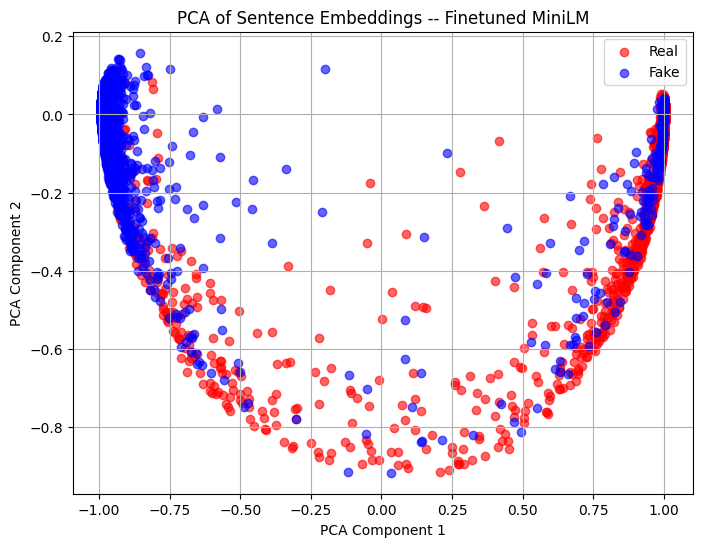

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming X is your embedding matrix and y is the label (0=fake, 1=real)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], label='Real', alpha=0.6, c='red')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], label='Fake', alpha=0.6, c='blue')
plt.title('PCA of Sentence Embeddings -- Finetuned MiniLM')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = log_reg.predict(X_val)

# Calculate accuracy
acc_log_reg = accuracy_score(y_val, y_pred)
print(f"Accuracy: {acc_log_reg:.4f}")
# Print classification report
print("\nClassification Report:\n", classification_report(y_val, y_pred))



Accuracy: 0.9782

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2022
           1       0.98      0.98      0.98      2022

    accuracy                           0.98      4044
   macro avg       0.98      0.98      0.98      4044
weighted avg       0.98      0.98      0.98      4044



In [ ]:
y_train_pred = log_reg.predict(X_train)
# Calculate accuracy on training set
acc_log_reg_train = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {acc_log_reg_train:.4f}")

Training Accuracy: 0.9885


In [ ]:
from sklearn.svm import LinearSVC

svm = LinearSVC(random_state=42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_val)
acc_svm = accuracy_score(y_val, y_pred)
print(f"Accuracy: {acc_svm:.4f}")
print("\nClassification Report:\n", classification_report(y_val, y_pred))


Accuracy: 0.9782

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2022
           1       0.98      0.98      0.98      2022

    accuracy                           0.98      4044
   macro avg       0.98      0.98      0.98      4044
weighted avg       0.98      0.98      0.98      4044



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_val)
acc_knn = accuracy_score(y_val, y_pred_knn)
print(f"Accuracy (KNN): {acc_knn:.4f}")
print("\nClassification Report (KNN):\n", classification_report(y_val, y_pred_knn))

Accuracy (KNN): 0.9770

Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      2022
           1       0.97      0.98      0.98      2022

    accuracy                           0.98      4044
   macro avg       0.98      0.98      0.98      4044
weighted avg       0.98      0.98      0.98      4044



In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    max_iter=500,
    alpha=0.1,  # Try values like 0.001, 0.01, 0.1
    random_state=42
)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_val)
acc_mlp = accuracy_score(y_val, y_pred_mlp)
print(f"Accuracy (MLP): {acc_mlp:.4f}")
print("\nClassification Report (MLP):\n", classification_report(y_val, y_pred_mlp))


Accuracy (MLP): 0.9792

Classification Report (MLP):
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2022
           1       0.98      0.98      0.98      2022

    accuracy                           0.98      4044
   macro avg       0.98      0.98      0.98      4044
weighted avg       0.98      0.98      0.98      4044



In [ ]:
# Compute accuracy on the training dataset
y_pred_train_mlp = log_reg.predict(X_train)
acc_train_mlp = accuracy_score(y_train, y_pred_train_mlp)
print(f"Training Accuracy (MLP): {acc_train_mlp:.4f}")

# Compute accuracy on the validation dataset
y_pred_val_mlp = log_reg.predict(X_val)
acc_val_mlp = accuracy_score(y_val, y_pred_val_mlp)
print(f"Validation Accuracy (MLP): {acc_val_mlp:.4f}")

Training Accuracy (MLP): 0.9885
Validation Accuracy (MLP): 0.9782


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Pipeline: scale embeddings before feeding to MLP
pipeline = Pipeline([
    # ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(max_iter=1000, random_state=42))
])

# Define grid
param_grid = {
    'mlp__hidden_layer_sizes': [(64,), (128,), (128, 64)],
    'mlp__alpha': [0.01, 0.1, 1],
    'mlp__early_stopping': [True]
}

# Grid search with 5-fold cross-validation
grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Run the search
grid.fit(X_train, y_train)

# Best model summary
print("Best parameters:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

# Evaluate on test set
from sklearn.metrics import accuracy_score, classification_report

y_pred = grid.predict(X_val)
print("Test Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters: {'mlp__alpha': 0.1, 'mlp__early_stopping': True, 'mlp__hidden_layer_sizes': (128, 64)}
Best CV accuracy: 0.9886841367893859
Test Accuracy: 0.9787339268051434

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2022
           1       0.98      0.98      0.98      2022

    accuracy                           0.98      4044
   macro avg       0.98      0.98      0.98      4044
weighted avg       0.98      0.98      0.98      4044



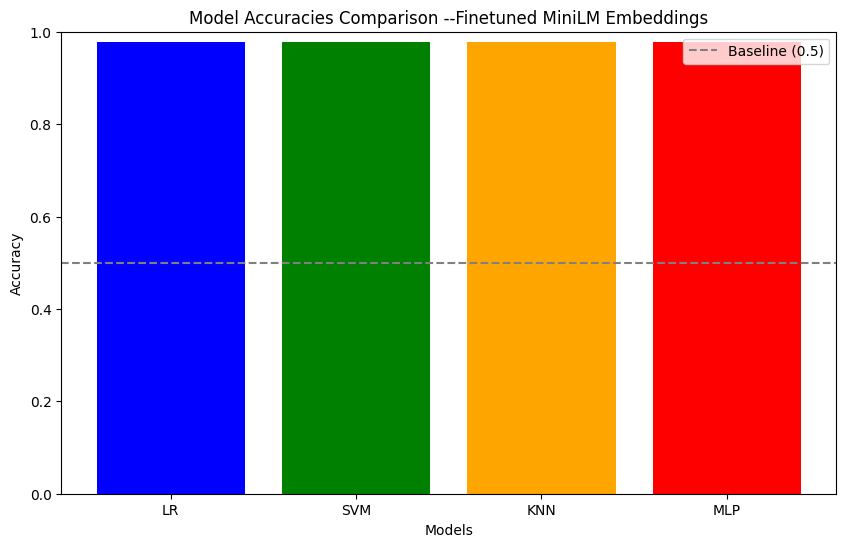

In [ ]:
import matplotlib.pyplot as plt

# Model names and their corresponding accuracies
models = ['LR', 'SVM', 'KNN', 'MLP']
accuracies = [acc_log_reg, acc_svm, acc_knn, acc_mlp]

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.axhline(y=0.5, color='gray', linestyle='--', label='Baseline (0.5)')  # Add baseline
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies Comparison --Finetuned MiniLM Embeddings')
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for better visualization
plt.legend()
plt.show()

In [ ]:
y_pred_test = mlp.predict(X_test)
# Calculate accuracy on the test set
acc_test = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {acc_test:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

Test Accuracy: 0.9768

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2022
           1       0.98      0.98      0.98      2022

    accuracy                           0.98      4044
   macro avg       0.98      0.98      0.98      4044
weighted avg       0.98      0.98      0.98      4044



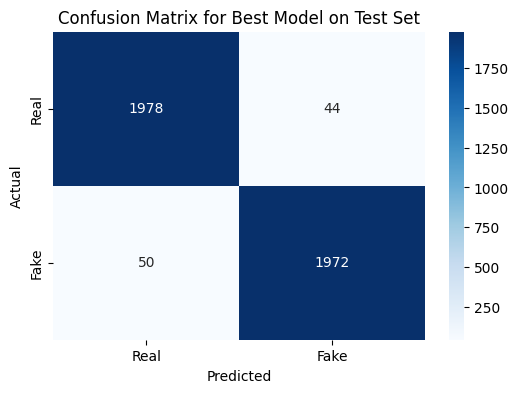

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Best Model on Test Set")
plt.show()

In [ ]:
rest_df = pd.read_csv('restaurant_reviews_anonymized.csv', encoding='latin1')

In [ ]:
print(rest_df.columns)

Index(['Restaurant', 'Review', 'Real', 'Reviewer', 'F1-AWL', 'F2-PAU',
       'F3-ANP', 'F4-ASL', 'F5-NCL', 'F6-NWO', 'F7-NVB', 'F8-NAJ', 'F9-NPV',
       'F10-EMO', 'F11-CDV', 'F12-RED', 'F13-LXD', 'F14-NMV', 'F15-NTY',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')


In [ ]:
print(rest_df.iloc[108]['Review'])

The restroom of this restraurant is dirty. It looks like they haven't clean this for a year. The lighting is dim, the decor subdued, and restaurant mostly quiet. Food is a bit pricey. Don't get the lamb phall. It's not just a spicy curry - it's over spiced with no salt. Rice was ok. Naan was too doughy (undercooked). Kinda disappointed


In [ ]:
X = rest_df['Review']

In [ ]:
y = 1 - rest_df['Real']

In [ ]:
print(1 - y)

0      1
1      1
2      1
3      1
4      1
      ..
105    0
106    1
107    1
108    1
109    1
Name: Real, Length: 110, dtype: int64


In [ ]:
X = rest_df['Review']
X = X.astype(str).apply(clean_text2)
print(X)

0      great food and great atmosphere! the chicken t...
1      i had heard good things about rose restaurant ...
2      i was driving by rose restaurant one day and d...
3      rose restaurant had the most modern and up-to-...
4      today is the third time i've come to gloria re...
                             ...                        
105    my family and i began dining with mr. pal circ...
106    samosa was not tasty at all. it was very plain...
107    i'm not sure if the food would be categorized ...
108    the restroom of this restraurant is dirty. it ...
109    food was very disappointing and even customer ...
Name: Review, Length: 110, dtype: object


In [ ]:
print(rest_df[rest_df['Real'] == 0])

            Restaurant                                             Review  \
0      Rose Restaurant  Great food and great atmosphere! The chicken t...   
1      Rose Restaurant  I had heard good things about Rose Restaurant ...   
2      Rose Restaurant  I was driving by rose restaurant one day and d...   
3      Rose Restaurant  Rose Restaurant had the most modern and up-to-...   
4    Gloria Restaurant  Today is the third time I've come to Gloria Re...   
5    Gloria Restaurant  I have been to Gloria Restaurant a couple time...   
6    Gloria Restaurant  Last Saturday I went to this restaurant hoping...   
7    Gloria Restaurant  First off, let me say I have never been to the...   
8    Jasmin Restaurant  Jasmin Restaurant is the best Indian food I ha...   
9    Jasmin Restaurant  Jasmin Restaurant's motto is "Where Customer i...   
10   Jasmin Restaurant  Coming from India myself I wanted to see if th...   
11   Jasmin Restaurant  My family and I met for lunch at Jasmin Restau...   

In [ ]:

# Function to clean text (basic cleaning, but keep punctuation for embeddings)
def clean_text2(text):
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text.lower()  # Convert to lowercase

X = rest_df['Review']
# Clean text_
X = X.astype(str).apply(clean_text2)

# Load a pretrained Sentence Transformer model
# model = SentenceTransformer('all-mpnet-base-v2')
model = SentenceTransformer('finetuned-embedding-model')

# Compute sentence embeddings
X = np.array(model.encode(X.tolist()))

You are trying to use a model that was created with Sentence Transformers version 4.1.0, but you're currently using version 4.0.2. This might cause unexpected behavior or errors. In that case, try to update to the latest version.


In [ ]:
print(X_finetuned)

[[ 0.05121171 -0.13156465 -0.08073665 ...  0.05205933  0.01949825
   0.04690118]
 [ 0.04662985 -0.1380331  -0.07783449 ...  0.05155411  0.01411614
   0.05094189]
 [ 0.05057134 -0.12763233 -0.08592441 ...  0.04771347  0.02953343
   0.0629709 ]
 ...
 [-0.04670896  0.13984248  0.08246821 ... -0.06363366 -0.01313448
  -0.05605846]
 [ 0.05277877 -0.13275316 -0.07662549 ...  0.04840408  0.01517112
   0.04900347]
 [-0.04701654  0.13481128  0.08522808 ... -0.06209384 -0.01470875
  -0.05672019]]


In [ ]:
print(X)

[[-0.04495174  0.13753489  0.08116673 ... -0.06321952 -0.01616529
  -0.05530517]
 [-0.04343902  0.13716242  0.0815728  ... -0.05884691 -0.01630191
  -0.05520564]
 [-0.04559323  0.13850327  0.08126646 ... -0.05699858 -0.01493956
  -0.05499023]
 ...
 [-0.04618524  0.13454536  0.08388436 ... -0.05787158 -0.0158796
  -0.05767959]
 [-0.04410589  0.13572685  0.0847453  ... -0.05754074 -0.01441442
  -0.05879719]
 [-0.04502635  0.13863991  0.08118697 ... -0.06241203 -0.01599463
  -0.05646808]]


In [ ]:
print(mlp.predict(X_finetuned).sum())

20159


In [ ]:
print(mlp.predict(X).sum())

1


In [ ]:
y_pred = svm.predict(X)

In [ ]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
acc_test= accuracy_score(y_pred, y)


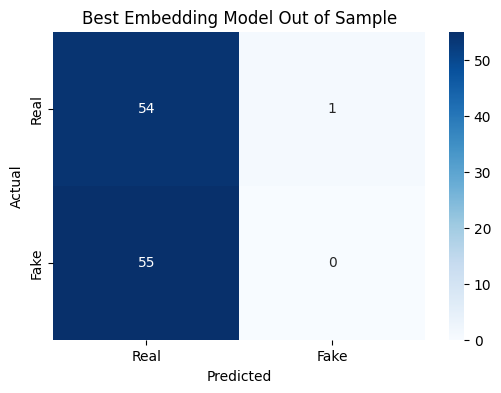

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Best Embedding Model Out of Sample")
plt.show()

In [ ]:
print(f"Test Accuracy: {acc_test:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

Test Accuracy: 0.4909

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2022
           1       0.98      0.98      0.98      2022

    accuracy                           0.98      4044
   macro avg       0.98      0.98      0.98      4044
weighted avg       0.98      0.98      0.98      4044

